::: {.callout-note collapse="true"}
## Learning Outcomes
- Use `matplotlib` and `seaborn` to create data visualization.
- Analyze histograms and identify the skewness, potential outliers and the mode.
- Use `boxplot` and `violinplot` to compare two distributions.
:::

**This content is covered in lectures 7.**

In our journey of the data science lifecycle, we have begun to explore the vast world of exploratory data analysis. More recently, we learned how to pre-process data using various data manipulation techniques. As we work towards understanding our data, there is one key component missing in our arsenal - the ability to visualize and discern relationships in existing data.

These next two lectures will introduce you to various examples of data visualizations and their underlying theory. In doing so, we'll motivate their importance in real-world examples with the use of plotting libraries.

## Visualizations in Data 8 and Data 100 (so far)

You've likely encountered several forms of data visualizations in your studies. You may remember two such examples from Data 8: line plots and histograms. Each of these served a unique purpose. For example, line plots displayed how numerical quantities changed over time, while histograms were useful in understanding a variable's distribution. 

:::: {.columns}

::: {.column width="30%"}
**Line Chart**

<img src="images/line_chart_viz.png" alt='line_chart_viz' width='300'>
:::

::: {.column width="30%"}
<!-- empty column to create gap -->
:::

::: {.column width="30%"}
**Histogram**

<img src="images/histogram_viz.png" alt='histogram_viz' width='300'>
:::

::::

## Goals of Visualization

Visualizations are useful for a number of reasons. In Data 100, we consider two areas in particular:

1. To broaden your understanding of the data
    - Key part in exploratory data analysis.
    - Useful in investigating relationships between variables.
2. To communicate results/conclusions to others 
    - Visualization theory is especially important here.

One of the most common applications of visualizations is in understanding a distribution of data.

This course note will focus on the first half of visualization topics in Data 100. The goal here is to understand how to choose the "right" plot depending on different variable types and, secondly, how to generate these plots using code.

## An Overview of Distributions

A distribution describes the frequency of unique values in a variable. Distributions must satisfy two properties:

   1. Each data point must belong to only one category.
   2. The total frequency of all categories must sum to 100%. In other words, their total count should equal the number of values in consideration.
   
:::: {.columns}

::: {.column width="30%"}
**Not a Valid Distribution**

<img src="images/bad_distro.png" alt='bad_distro' width='300'>
:::

::: {.column width="30%"}
<!-- empty column to create gap -->
:::

::: {.column width="30%"}
**Valid Distribution**

<img src="images/good_distro.png" alt='good_distro' width='300'>
:::

::::

Left Diagram: This is not a valid distribution since individuals can be associated to more than one category and the bar values demonstrate values in minutes and not probability 

Right Diagram: This example satisfies the two properties of distributions, so it is a valid distribution.

## Variable Types Should Inform Plot Choice

Different plots are more or less suited for displaying particular types of variables, laid out in the diagram below:

<img src="images/variable_types_vis_1.png" alt='variable_types_diagram' width='600'>


## Bar Plots

As we saw above, a **bar plot** is one of the most common ways of displaying the distribution of a **qualitative** (categorical) variable. The length of a bar plot encodes the frequency of a category; the width encodes no useful information. The color *could* indicate a sub-category, but this is not necessarily the case. 

Let's contextualize this in an example. We will use the World Bank dataset (`wb`) in our analysis.

In [19]:
#| code-fold: true
import pandas as pd
import numpy as np

wb = pd.read_csv("data/world_bank.csv", index_col=0)
wb.head()

,Continent,Country,Primary completion rate: Male: % of relevant age group: 2015,Primary completion rate: Female: % of relevant age group: 2015,Lower secondary completion rate: Male: % of relevant age group: 2015,Lower secondary completion rate: Female: % of relevant age group: 2015,Youth literacy rate: Male: % of ages 15-24: 2005-14,Youth literacy rate: Female: % of ages 15-24: 2005-14,Adult literacy rate: Male: % ages 15 and older: 2005-14,Adult literacy rate: Female: % ages 15 and older: 2005-14,...,Access to improved sanitation facilities: % of population: 1990,Access to improved sanitation facilities: % of population: 2015,Child immunization rate: Measles: % of children ages 12-23 months: 2015,Child immunization rate: DTP3: % of children ages 12-23 months: 2015,Children with acute respiratory infection taken to health provider: % of children under age 5 with ARI: 2009-2016,Children with diarrhea who received oral rehydration and continuous feeding: % of children under age 5 with diarrhea: 2009-2016,Children sleeping under treated bed nets: % of children under age 5: 2009-2016,Children with fever receiving antimalarial drugs: % of children under age 5 with fever: 2009-2016,Tuberculosis: Treatment success rate: % of new cases: 2014,Tuberculosis: Cases detection rate: % of new estimated cases: 2015
0,Africa,Algeria,106.0,105.0,68.0,85.0,96.0,92.0,83.0,68.0,...,80.0,88.0,95.0,95.0,66.0,42.0,NaN,NaN,88.0,80.0
1,Africa,Angola,NaN,NaN,NaN,NaN,79.0,67.0,82.0,60.0,...,22.0,52.0,55.0,64.0,NaN,NaN,25.9,28.3,34.0,64.0
2,Africa,Benin,83.0,73.0,50.0,37.0,55.0,31.0,41.0,18.0,...,7.0,20.0,75.0,79.0,23.0,33.0,72.7,25.9,89.0,61.0
3,Africa,Botswana,98.0,101.0,86.0,87.0,96.0,99.0,87.0,89.0,...,39.0,63.0,97.0,95.0,NaN,NaN,NaN,NaN,77.0,62.0
5,Africa,Burundi,58.0,66.0,35.0,30.0,90.0,88.0,89.0,85.0,...,42.0,48.0,93.0,94.0,55.0,43.0,53.8,25.4,91.0,51.0


We can visualize the distribution of the `Continent` column using a bar plot. There are a few ways to do this.

### Plotting in Pandas

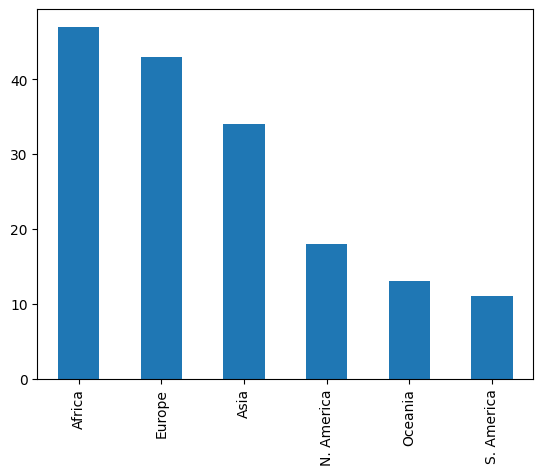

In [20]:
wb['Continent'].value_counts().plot(kind = 'bar');

Recall that `.value_counts()` returns a `Series` with the total count of each unique value. We call `.plot(kind = 'bar')` on this result to visualize these counts as a bar plot.

Plotting methods in `pandas` are the least preferred and not supported in Data 100, as their functionality is limited. Instead, future examples will focus on other libraries built specifically for visualizing data. The most well-known library here is `matplotlib`.

### Plotting in Matplotlib

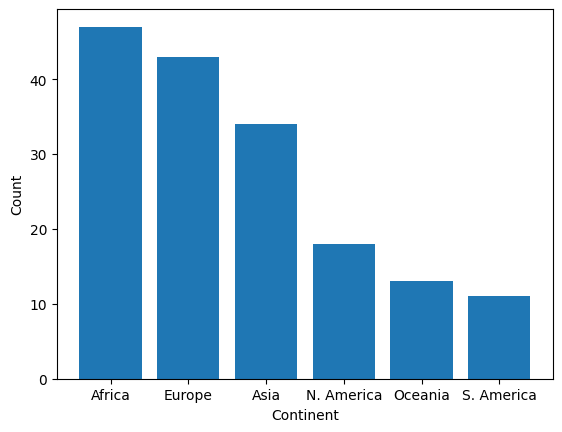

In [21]:
import matplotlib.pyplot as plt # matplotlib is typically given the alias plt

continent = wb['Continent'].value_counts()
plt.bar(continent.index, continent)
plt.xlabel('Continent')
plt.ylabel('Count');

While more code is required to achieve the same result, `matplotlib` is often used over `pandas` for its ability to plot more complex visualizations, some of which are discussed shortly.

However, note how we needed to label the axes with `plt.xlabel` and `plt.ylabel` - `matplotlib` does not support automatic axis labeling. To get around these inconveniences, we can use a more efficient plotting library, `seaborn`.

### Plotting in Seaborn

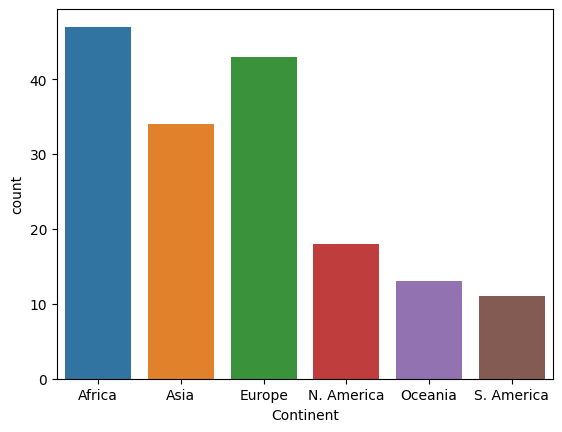

In [22]:
import seaborn as sns # seaborn is typically given the alias sns
sns.countplot(data = wb, x = 'Continent');

`seaborn.countplot` both counts and visualizes the number of unique values in a given column. This column is specified by the `x` argument to `sns.countplot`, while the `DataFrame` is specified by the `data` argument. In contrast to `matplotlib`, the general structure of a seaborn call involves passing in an entire DataFrame, and then specify what column(s) to plot.

For the vast majority of visualizations, `seaborn` is far more concise and aesthetically pleasing than `matplotlib`. However, the color scheme of this particular bar plot is arbitrary - it encodes no additional information about the categories themselves. This is not always true; color may signify meaningful detail in other visualizations. We'll explore this more in-depth during the next lecture.

By now, you'll have noticed that each of these plotting libraries have a very different syntax. As with `pandas`, we'll teach you the important methods in `matplotlib` and `seaborn`, but you'll learn more through documentation.

1. [Matplotlib Documentation](https://matplotlib.org/stable/index.html)
2. [Seaborn Documentation](https://seaborn.pydata.org/)

Example Questions:

- What colors should we use?
- How wide should the bars be?
- Should the legend exist?
- Should the bars and axes have dark borders?

To accomplish goal 2, here are some ways we can improve plot:

- Introducing different colors for each bar
- Including a legend
- Including a title
- Labeling the y-axis
- Using color-blind friendly palettes
- Re-orienting the labels
- Increase the font size


## Histograms

**Histograms** are a natural extension to bar plots; they visualize the distribution of **quantitative** (numerical) data.

Revisiting our example with the `wb` DataFrame, let's plot the distribution of `Gross national income per capita`.

In [23]:
#| code-fold: true
wb.head(5)

,Continent,Country,Primary completion rate: Male: % of relevant age group: 2015,Primary completion rate: Female: % of relevant age group: 2015,Lower secondary completion rate: Male: % of relevant age group: 2015,Lower secondary completion rate: Female: % of relevant age group: 2015,Youth literacy rate: Male: % of ages 15-24: 2005-14,Youth literacy rate: Female: % of ages 15-24: 2005-14,Adult literacy rate: Male: % ages 15 and older: 2005-14,Adult literacy rate: Female: % ages 15 and older: 2005-14,...,Access to improved sanitation facilities: % of population: 1990,Access to improved sanitation facilities: % of population: 2015,Child immunization rate: Measles: % of children ages 12-23 months: 2015,Child immunization rate: DTP3: % of children ages 12-23 months: 2015,Children with acute respiratory infection taken to health provider: % of children under age 5 with ARI: 2009-2016,Children with diarrhea who received oral rehydration and continuous feeding: % of children under age 5 with diarrhea: 2009-2016,Children sleeping under treated bed nets: % of children under age 5: 2009-2016,Children with fever receiving antimalarial drugs: % of children under age 5 with fever: 2009-2016,Tuberculosis: Treatment success rate: % of new cases: 2014,Tuberculosis: Cases detection rate: % of new estimated cases: 2015
0,Africa,Algeria,106.0,105.0,68.0,85.0,96.0,92.0,83.0,68.0,...,80.0,88.0,95.0,95.0,66.0,42.0,NaN,NaN,88.0,80.0
1,Africa,Angola,NaN,NaN,NaN,NaN,79.0,67.0,82.0,60.0,...,22.0,52.0,55.0,64.0,NaN,NaN,25.9,28.3,34.0,64.0
2,Africa,Benin,83.0,73.0,50.0,37.0,55.0,31.0,41.0,18.0,...,7.0,20.0,75.0,79.0,23.0,33.0,72.7,25.9,89.0,61.0
3,Africa,Botswana,98.0,101.0,86.0,87.0,96.0,99.0,87.0,89.0,...,39.0,63.0,97.0,95.0,NaN,NaN,NaN,NaN,77.0,62.0
5,Africa,Burundi,58.0,66.0,35.0,30.0,90.0,88.0,89.0,85.0,...,42.0,48.0,93.0,94.0,55.0,43.0,53.8,25.4,91.0,51.0


How should we define our categories for this variable? In the previous example, these were a few unique values of the `Continent` column. If we use similar logic here, our categories are the different numerical values contained in the `Gross national income per capita` column.

Under this assumption, let's plot this distribution using the `seaborn.countplot` function.

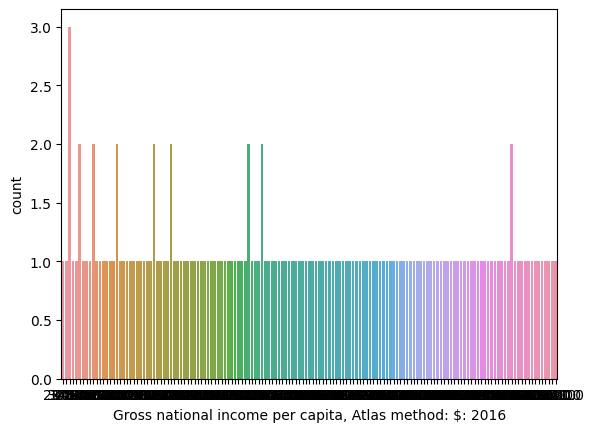

In [24]:
sns.countplot(data = wb, x = 'Gross national income per capita, Atlas method: $: 2016');

What happened? A bar plot (either plt.bar or sns.countplot) will create a separate bar for each unique value of a variable. With a continuous variable, we may not have a finite number of possible values, which can lead to situations where we would need many, many bars to display each unique value.

Specifically, we can say this histogram suffers from **overplotting** as we are unable to interpret the plot and gain any meaningful insight. 

Rather than bar plots, to visualize the distribution of a continuous variable, we use one of the following types of plots:

- Histogram
- Box plot
- Violin plot

## Box Plots and Violin Plots

Box plots and violin plots are two very similar kinds of visualizations. Both display the distribution of a variable using information about quartiles.

In a box plot, the width of the box at any point does not encode meaning. In a violin plot, the width of the plot indicates the density of the distribution at each possible value.


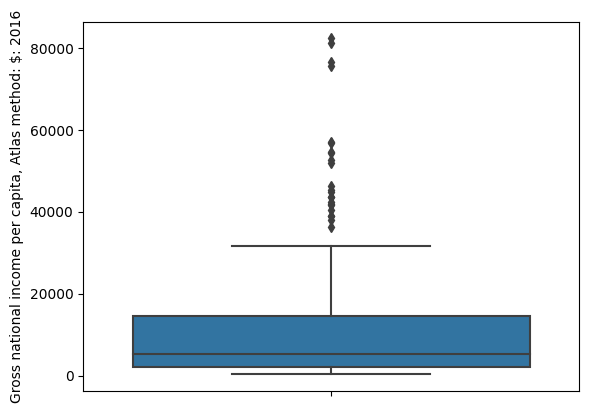

In [25]:
sns.boxplot(data=wb, y='Gross national income per capita, Atlas method: $: 2016');

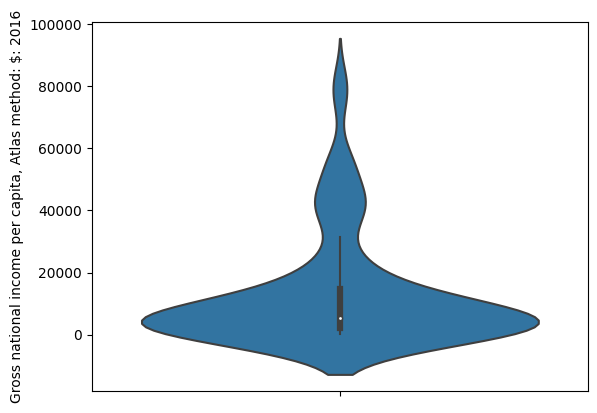

In [26]:
sns.violinplot(data=wb, y="Gross national income per capita, Atlas method: $: 2016");

A quartile represents a 25% portion of the data. We say that:

- The first quartile (Q1) repesents the 25th percentile – 25% of the data lies below the first quartile
- The second quartile (Q2) represents the 50th percentile, also known as the median – 50% of the data lies below the second quartile
- The third quartile (Q3) represents the 75th percentile – 75% of the data lies below the third quartile.

This means that the middle 50% of the data lies between the first and third quartiles. This is demonstrated in the histogram below. The three quartiles are marked with red vertical bars.

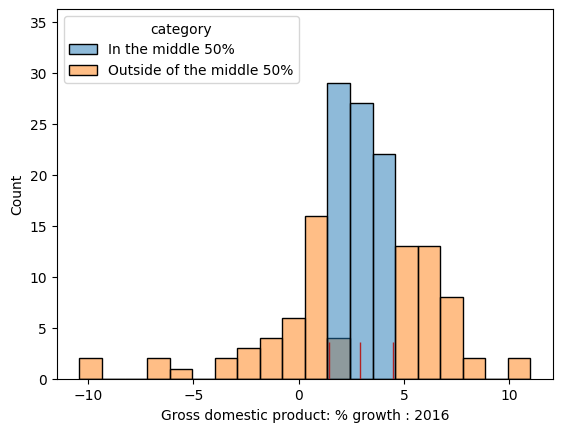

In [27]:
gdp = wb['Gross domestic product: % growth : 2016']
gdp = gdp[~gdp.isna()]

q1, q2, q3 = np.percentile(gdp, [25, 50, 75])

wb_quartiles = wb.copy()
wb_quartiles['category'] = None
wb_quartiles.loc[(wb_quartiles['Gross domestic product: % growth : 2016'] < q1) | (wb_quartiles['Gross domestic product: % growth : 2016'] > q3), 'category'] = 'Outside of the middle 50%'
wb_quartiles.loc[(wb_quartiles['Gross domestic product: % growth : 2016'] > q1) & (wb_quartiles['Gross domestic product: % growth : 2016'] < q3), 'category'] = 'In the middle 50%'

sns.histplot(wb_quartiles, x="Gross domestic product: % growth : 2016", hue="category")
sns.rugplot([q1, q2, q3], c="firebrick", lw=6, height=0.1);

In a box plot, the lower extent of the box lies at Q1, while the upper extent of the box lies at Q3. The horizontal line in the middle of the box corresponds to Q2 (equivalently, the median).

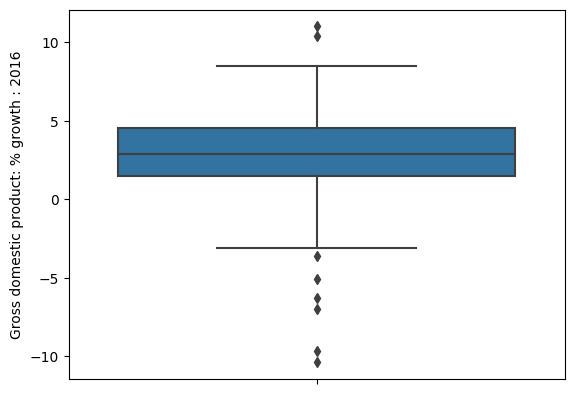

In [28]:
sns.boxplot(data=wb, y='Gross domestic product: % growth : 2016');

The **whiskers** of a box-plot are the two points that lie at the \[$1^{st}$ Quartile $-$ ($1.5\times$ IQR)\], and the \[$3^{rd}$ Quartile $+$ ($1.5\times$ IQR)\]. They are the lower and upper ranges of "normal" data (the points excluding outliers). 

The different forms of information contained in a box plot can be summarised as follows:

<img src="images/box_plot_diagram.png" alt='box_plot_diagram' width='600'>

A violin plot display quartile information, albeit a bit more subtly. Look closely at the center vertical bar of the violin plot below!

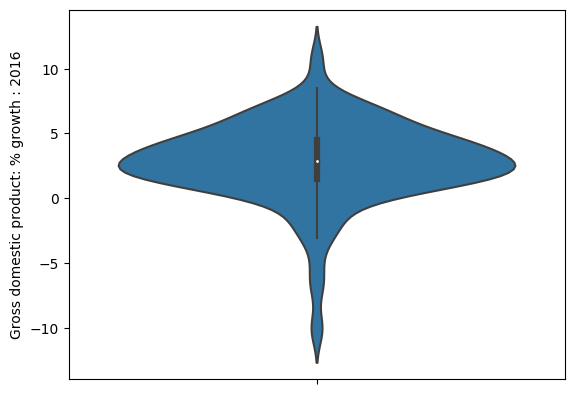

In [29]:
sns.violinplot(data=wb, y='Gross domestic product: % growth : 2016');

## Side-by-side Box and Violin Plots

Plotting side-by-side box or violin plots allow us to compare distributions across different categories. In other words, they enable us to plot both a qualitative variable and a quantitative continuous variable in one visualization.

Seaborn allows us to easily create side-by-side plots by specify both an x and y column.

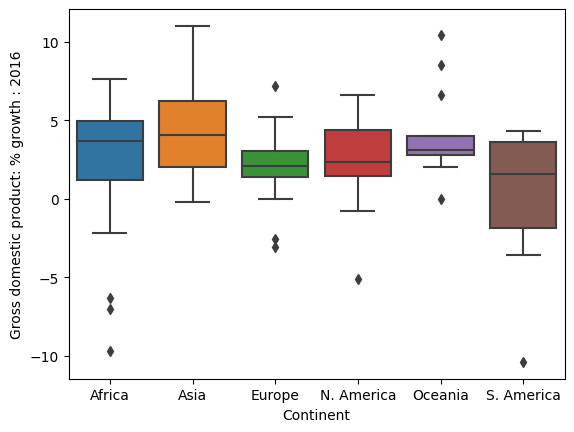

In [30]:
sns.boxplot(data=wb, x="Continent", y='Gross domestic product: % growth : 2016');

## Plotting Histograms

You are likely familiar with histograms from Data 8. A histogram collects continuous data into bins, then plots this binned data. Each bin reflects the density of datapoints with values that lie between the left and right ends of the bin.

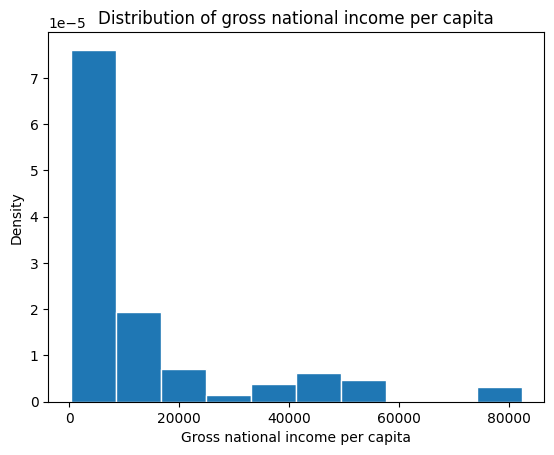

In [31]:
# The `edgecolor` argument controls the color of the bin edges
gni = wb["Gross national income per capita, Atlas method: $: 2016"]
plt.hist(gni, density=True, edgecolor="white")

# Add labels
plt.xlabel("Gross national income per capita")
plt.ylabel("Density")
plt.title("Distribution of gross national income per capita");

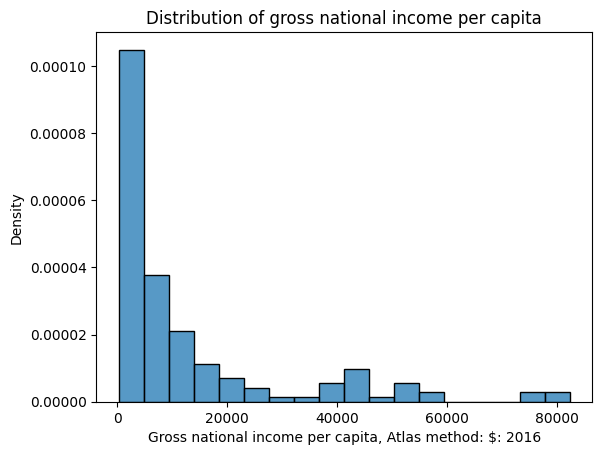

In [32]:
sns.histplot(data=wb, x="Gross national income per capita, Atlas method: $: 2016", stat="density")
plt.title("Distribution of gross national income per capita");

### Overlaid Histograms

We can overlay histograms (or density curves) to compare distributions across qualitative categories.

The hue parameter of sns.histplot specifies the column that should be used to determine the color of each category. hue can be used in many Seaborn plotting functions.

Notice that the resulting plot includes a legend describing which color corresponds to each hemisphere – a legend should always be included if color is used to encode information in a visualization!

In [33]:
# Create a new variable to store the hemisphere in which each country is located
north = ["Asia", "Europe", "N. America"]
south = ["Africa", "Oceania", "S. America"]
wb.loc[wb["Continent"].isin(north), "Hemisphere"] = "Northern"
wb.loc[wb["Continent"].isin(south), "Hemisphere"] = "Southern"

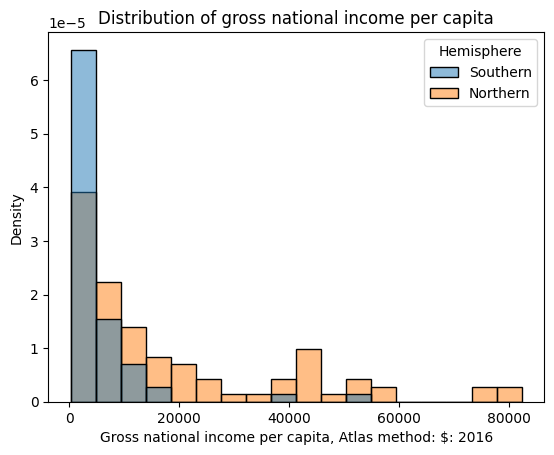

In [34]:
sns.histplot(data=wb, x="Gross national income per capita, Atlas method: $: 2016", hue="Hemisphere", stat="density")
plt.title("Distribution of gross national income per capita");

Each bin of a histogram is scaled such that its area is equal to the percentage of all datapoints that it contains.

First bin has width 16410.0 and height 4.7741589911386953e-05
This corresponds to 16410.0 * 4.7741589911386953e-05 = 78.343949044586% of the data


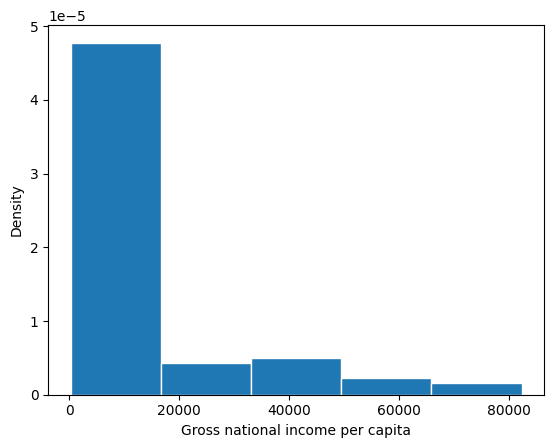

In [35]:

densities, bins, _ = plt.hist(gni, density=True, edgecolor="white", bins=5)
plt.xlabel("Gross national income per capita")
plt.ylabel("Density")

print(f"First bin has width {bins[1]-bins[0]} and height {densities[0]}")
print(f"This corresponds to {bins[1]-bins[0]} * {densities[0]} = {(bins[1]-bins[0])*densities[0]*100}% of the data")

## Evaluating Histograms

Histograms allow us to assess a distribution by their shape. There are a few properties of histograms we can analyze:

1. Skewness and Tails
    - Skewed left vs skewed right
    - Left tail vs right tail
2. Outliers
    - Using percentiles
3. Modes
    - Most commonly occuring data

### Skewness and Tails

The skew of a histogram describes the direction in which its "tail" extends.
- A distribution with a long right tail is **skewed right** (such as `Gross national income per capita`). In a right-skewed distribution, the few large outliers "pull" the mean to the **right** of the median. 
- A distribution with a long left tail is **skewed left** (such as `Access to an improved water source`). In a left-skewed distribution, the few small outliers "pull" the mean to the **left** of the median. 

In the case where a distribution has equal-sized right and left tails, it is **symmetric**. The mean is approximately **equal** to the median. Think of mean as the balancing point of the distribution

Text(0.5, 1.0, 'Distribution with a long right tail')

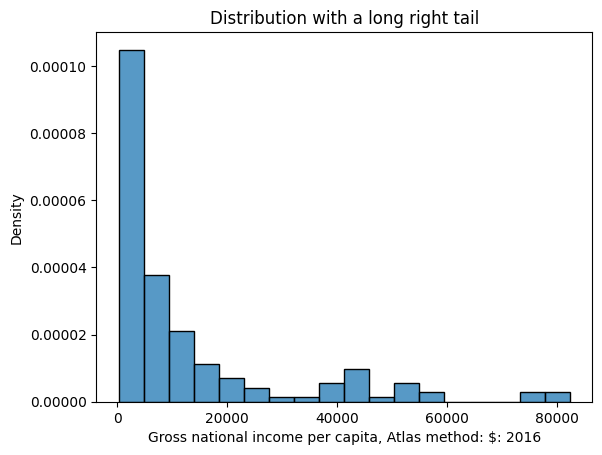

In [36]:
sns.histplot(data = wb, x = 'Gross national income per capita, Atlas method: $: 2016', stat = 'density');
plt.title('Distribution with a long right tail')

Text(0.5, 1.0, 'Distribution with a long left tail')

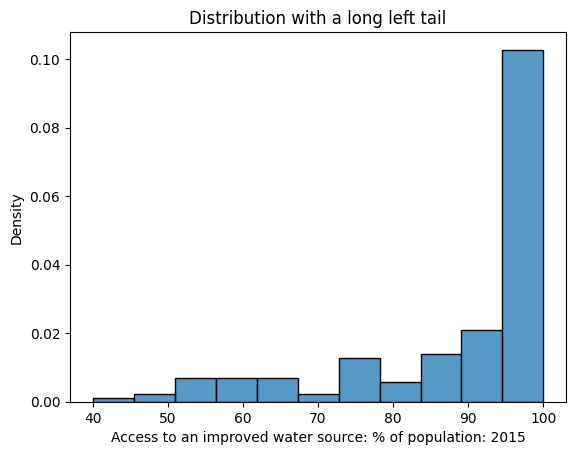

In [37]:
sns.histplot(data = wb, x = 'Access to an improved water source: % of population: 2015', stat = 'density');
plt.title('Distribution with a long left tail')

### Outliers

Loosely speaking, an **outlier** is defined as a data point that lies an abnormally large distance away from other values. Let's make this more concrete. As you may have observed in the box plot infographic earlier, we define **outliers** to be the data points that fall beyond the whiskers. Specifically, values that are less than the \[$1^{st}$ Quartile $-$ ($1.5\times$ IQR)\], or greater than \[$3^{rd}$ Quartile $+$ ($1.5\times$ IQR).\]

### Modes

In Data 100, we describe a "mode" of a histogram as a peak in the distribution. Often, however, it is difficult to determine what counts as its own "peak." For example, the number of peaks in the distribution of HIV rates across different countries varies depending on the number of histogram bins we plot.

If we set the number of bins to 5, the distribution appears unimodal.

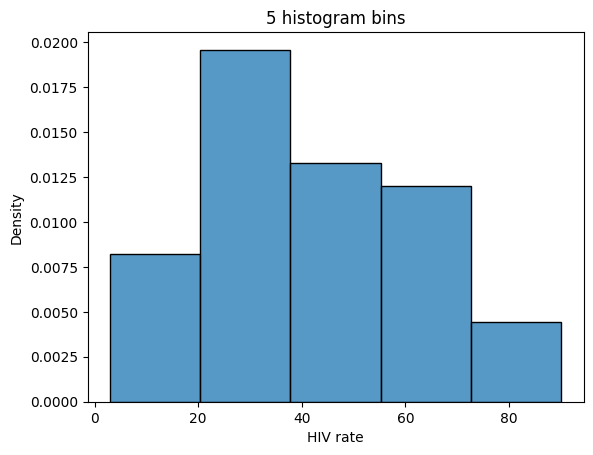

In [38]:
# Rename the very long column name for convenience
wb = wb.rename(columns={'Antiretroviral therapy coverage: % of people living with HIV: 2015':"HIV rate"})
# With 5 bins, it seems that there is only one peak
sns.histplot(data=wb, x="HIV rate", stat="density", bins=5)
plt.title("5 histogram bins");

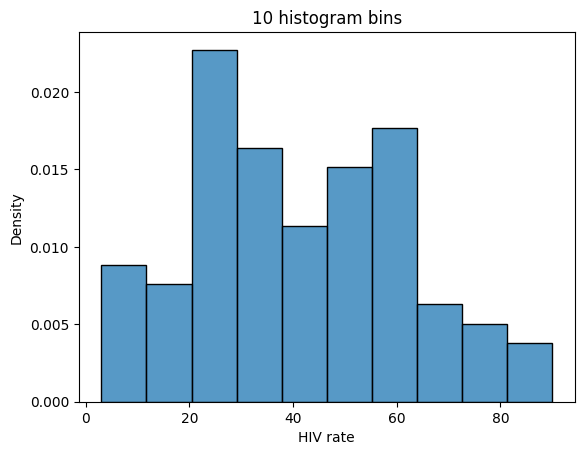

In [39]:
# With 10 bins, there seem to be two peaks

sns.histplot(data=wb, x="HIV rate", stat="density", bins=10)
plt.title("10 histogram bins");

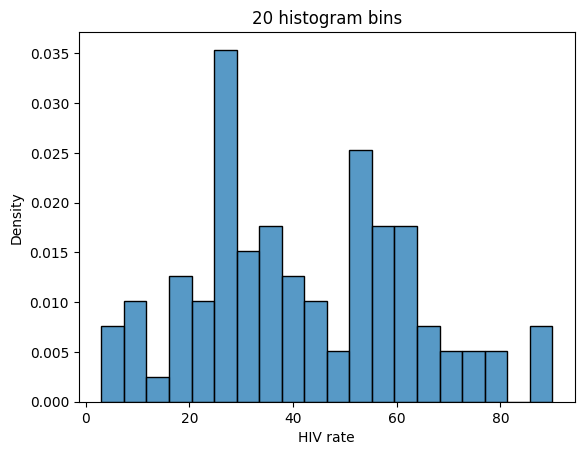

In [40]:
# And with 20 bins, it becomes hard to say what counts as a "peak"!

sns.histplot(data=wb, x ="HIV rate", stat="density", bins=20)
plt.title("20 histogram bins");

In part, it is these ambiguities that motivate us to consider using Kernel Density Estimation (KDE), which we will explore more in Lecture 8. 